In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nifty_50_symbols = [
    "ADANIENT.NS", "ADANIPORTS.NS", "ASIANPAINT.NS", "AXISBANK.NS", "BAJAJ-AUTO.NS",
    "BAJFINANCE.NS", "BAJAJFINSV.NS", "BPCL.NS", "BHARTIARTL.NS", "BRITANNIA.NS",
    "CIPLA.NS", "COALINDIA.NS", "DIVISLAB.NS", "DRREDDY.NS", "EICHERMOT.NS",
    "GRASIM.NS", "HCLTECH.NS", "HDFCBANK.NS", "HEROMOTOCO.NS",
    "HINDALCO.NS", "HINDUNILVR.NS", "ICICIBANK.NS", "ITC.NS", "INDUSINDBK.NS",
    "INFY.NS", "JSWSTEEL.NS", "KOTAKBANK.NS", "LT.NS",
    "M&M.NS", "MARUTI.NS", "NESTLEIND.NS", "NTPC.NS", "ONGC.NS",
    "POWERGRID.NS", "RELIANCE.NS", "SBIN.NS", "SUNPHARMA.NS",
    "TCS.NS", "TATACONSUM.NS", "TATAMOTORS.NS", "TATASTEEL.NS", "TECHM.NS",
    "TITAN.NS", "UPL.NS", "ULTRACEMCO.NS", "WIPRO.NS", "HINDPETRO.NS"
]
start_date = "2011-01-01"
end_date = "2014-01-01"

trading_data = {}
trading_data = {}

for symbol in nifty_50_symbols:
    df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'Close']]
    df.dropna(inplace=True)
    trading_data[symbol] = df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [2]:
df = pd.DataFrame(columns=[f"col_{i}" for i in range(93)])
y_arr = []
for symbol in nifty_50_symbols:
    for t in range(241, len(trading_data[symbol])):
        t_arr = []
        
        # ---- First lag set: m in {1, 2, ..., 20}
        for m in range(1, 21):
            ir_t_m = float(trading_data[symbol]["Close"].iloc[t - m] / trading_data[symbol]["Open"].iloc[t - m] - 1)
            cr_t_m = float(trading_data[symbol]["Close"].iloc[t - 1] / trading_data[symbol]["Close"].iloc[t - 1 - m] - 1)
            or_t_m = float(trading_data[symbol]["Open"].iloc[t] / trading_data[symbol]["Close"].iloc[t - m] - 1)
            
            t_arr.extend([ir_t_m, cr_t_m, or_t_m])  # ✅ use extend for cleaner code

        # ---- Second lag set: m in {40, 60, ..., 240}
        for m in range(40, 241, 20):
            ir_t_m = float(trading_data[symbol]["Close"].iloc[t - m] / trading_data[symbol]["Open"].iloc[t - m] - 1)
            cr_t_m = float(trading_data[symbol]["Close"].iloc[t - 1] / trading_data[symbol]["Close"].iloc[t - 1 - m] - 1)
            or_t_m = float(trading_data[symbol]["Open"].iloc[t] / trading_data[symbol]["Close"].iloc[t - m] - 1)
            
            t_arr.extend([ir_t_m, cr_t_m, or_t_m])

        # ✅ Now append only clean float values
        df.loc[len(df)] = t_arr
        
        # ✅ Compute the target as a float
        target = float(trading_data[symbol]["Close"].iloc[t] / trading_data[symbol]["Open"].iloc[t] - 1)
        y_arr.append(target)

    print(f"Processed symbol: {symbol}")

# ✅ Assign final target column
df["target"] = y_arr

Processed symbol: ADANIENT.NS
Processed symbol: ADANIPORTS.NS
Processed symbol: ASIANPAINT.NS
Processed symbol: AXISBANK.NS
Processed symbol: BAJAJ-AUTO.NS
Processed symbol: BAJFINANCE.NS
Processed symbol: BAJAJFINSV.NS
Processed symbol: BPCL.NS
Processed symbol: BHARTIARTL.NS
Processed symbol: BRITANNIA.NS
Processed symbol: CIPLA.NS
Processed symbol: COALINDIA.NS
Processed symbol: DIVISLAB.NS
Processed symbol: DRREDDY.NS
Processed symbol: EICHERMOT.NS
Processed symbol: GRASIM.NS
Processed symbol: HCLTECH.NS
Processed symbol: HDFCBANK.NS
Processed symbol: HEROMOTOCO.NS
Processed symbol: HINDALCO.NS
Processed symbol: HINDUNILVR.NS
Processed symbol: ICICIBANK.NS
Processed symbol: ITC.NS
Processed symbol: INDUSINDBK.NS
Processed symbol: INFY.NS
Processed symbol: JSWSTEEL.NS
Processed symbol: KOTAKBANK.NS
Processed symbol: LT.NS
Processed symbol: M&M.NS
Processed symbol: MARUTI.NS
Processed symbol: NESTLEIND.NS
Processed symbol: NTPC.NS
Processed symbol: ONGC.NS
Processed symbol: POWERGRID

In [5]:
df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,target
0,0.027023,0.031310,6.850498e-03,0.001447,0.029657,0.038375,-0.000321,0.040330,3.671040e-02,-0.003711,...,0.001240,-0.474944,-0.460961,0.023421,-0.426929,-0.440263,0.000538,-0.500114,-0.497928,0.008505
1,0.008505,0.015414,2.299920e-03,0.027023,0.047206,0.017749,0.001447,0.045527,4.961472e-02,-0.000321,...,-0.029773,-0.456377,-0.449538,0.045373,-0.435502,-0.458390,0.010930,-0.493658,-0.493816,-0.015451
2,-0.015451,-0.013186,-1.538212e-02,0.008505,0.002024,-0.028365,0.027023,0.033398,-1.338912e-02,0.001447,...,-0.010751,-0.458043,-0.460895,-0.012869,-0.466758,-0.468639,-0.017758,-0.501637,-0.503478,0.026195
3,0.026195,0.010410,4.766861e-03,-0.015451,-0.002913,0.015227,0.008505,0.012455,1.839844e-03,0.027023,...,-0.005360,-0.446773,-0.444416,-0.004232,-0.454720,-0.439127,-0.028837,-0.490471,-0.474756,-0.041935
4,-0.041935,-0.037368,-7.987247e-03,0.026195,-0.027346,-0.045056,-0.015451,-0.040172,-3.511508e-02,0.008505,...,-0.004283,-0.467714,-0.471120,-0.015630,-0.462647,-0.464664,-0.081474,-0.496782,-0.463610,-0.054428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,0.003692,0.003691,-4.326281e-04,0.046591,0.049739,0.003257,-0.021556,0.038651,4.928471e-02,0.044356,...,0.042220,-0.165043,-0.200317,0.084455,-0.263871,-0.285284,0.050025,-0.188431,-0.229369,0.027056
23402,0.027056,0.026612,8.263283e-08,0.003692,0.030402,0.026612,0.046591,0.077674,3.040172e-02,-0.021556,...,-0.022623,-0.178681,-0.166833,-0.032637,-0.265947,-0.245085,0.047930,-0.208518,-0.245200,-0.001265
23403,-0.001265,-0.001264,2.110174e-03,0.027056,0.025314,0.000843,0.003692,0.029099,2.747747e-02,0.046591,...,0.007873,-0.167887,-0.173753,0.008828,-0.246040,-0.249920,-0.019861,-0.246154,-0.231009,0.010318
23404,0.010318,0.012450,8.335383e-04,-0.001265,0.011170,0.013294,0.027056,0.038079,1.201264e-02,0.003692,...,0.000166,-0.165228,-0.163698,-0.002560,-0.242181,-0.240977,-0.040286,-0.223075,-0.251710,-0.016452


In [3]:
df.to_csv("training_data_2014_15.csv", index=False)

In [6]:
from sklearn.ensemble import RandomForestRegressor
# Extract features (X) and target (y)
X_train = df.drop(columns=["target"])
y_train = df["target"]

# Compute max_features = ⌊sqrt(p)⌋ where p = number of features
p = X_train.shape[1]
max_features = int(np.sqrt(p))

# Initialize the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=1000,
    max_depth=10,
    max_features=max_features,
    random_state=42,
    n_jobs=-1
)

# Fit the model
rf_model.fit(X_train, y_train)
import joblib
# Save the model
joblib.dump(rf_model, 'random_forest_model_2014_15.pkl')

['random_forest_model_2014_15.pkl']

In [7]:
for symbols in nifty_50_symbols:
    print(len(trading_data[symbols]), end=", ")

739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 739, 

In [9]:
start_date = "2011-01-01"
end_date = "2015-01-01"
trading_data = {}

for symbol in nifty_50_symbols:
    df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'Close']]
    df.dropna(inplace=True)
    trading_data[symbol] = df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [10]:
for symbols in nifty_50_symbols:
    print(len(trading_data[symbols]), end=", ")

983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 983, 

In [12]:
df_list = []
for symbol in nifty_50_symbols:
    df = pd.DataFrame(columns=[f"col_{i}" for i in range(93)])
    y_arr = []

    for t in range(740, len(trading_data[symbol])):
        t_arr = []
        
        # ---- First lag set: m in {1, 2, ..., 20}
        for m in range(1, 21):
            ir_t_m = float(trading_data[symbol]["Close"].iloc[t - m] / trading_data[symbol]["Open"].iloc[t - m] - 1)
            cr_t_m = float(trading_data[symbol]["Close"].iloc[t - 1] / trading_data[symbol]["Close"].iloc[t - 1 - m] - 1)
            or_t_m = float(trading_data[symbol]["Open"].iloc[t] / trading_data[symbol]["Close"].iloc[t - m] - 1)
            
            t_arr.extend([ir_t_m, cr_t_m, or_t_m])  # ✅ use extend for cleaner code

        # ---- Second lag set: m in {40, 60, ..., 240}
        for m in range(40, 241, 20):
            ir_t_m = float(trading_data[symbol]["Close"].iloc[t - m] / trading_data[symbol]["Open"].iloc[t - m] - 1)
            cr_t_m = float(trading_data[symbol]["Close"].iloc[t - 1] / trading_data[symbol]["Close"].iloc[t - 1 - m] - 1)
            or_t_m = float(trading_data[symbol]["Open"].iloc[t] / trading_data[symbol]["Close"].iloc[t - m] - 1)
            
            t_arr.extend([ir_t_m, cr_t_m, or_t_m])

        # ✅ Now append only clean float values
        df.loc[len(df)] = t_arr
        
        # ✅ Compute the target as a float
        target = float(trading_data[symbol]["Close"].iloc[t] / trading_data[symbol]["Open"].iloc[t] - 1)
        y_arr.append(target)

    # ✅ Assign final target column
    df["target"] = y_arr
    df_list.append(df)
    print(f"Processed symbol: {symbol}")

Processed symbol: ADANIENT.NS
Processed symbol: ADANIPORTS.NS
Processed symbol: ASIANPAINT.NS
Processed symbol: AXISBANK.NS
Processed symbol: BAJAJ-AUTO.NS
Processed symbol: BAJFINANCE.NS
Processed symbol: BAJAJFINSV.NS
Processed symbol: BPCL.NS
Processed symbol: BHARTIARTL.NS
Processed symbol: BRITANNIA.NS
Processed symbol: CIPLA.NS
Processed symbol: COALINDIA.NS
Processed symbol: DIVISLAB.NS
Processed symbol: DRREDDY.NS
Processed symbol: EICHERMOT.NS
Processed symbol: GRASIM.NS
Processed symbol: HCLTECH.NS
Processed symbol: HDFCBANK.NS
Processed symbol: HEROMOTOCO.NS
Processed symbol: HINDALCO.NS
Processed symbol: HINDUNILVR.NS
Processed symbol: ICICIBANK.NS
Processed symbol: ITC.NS
Processed symbol: INDUSINDBK.NS
Processed symbol: INFY.NS
Processed symbol: JSWSTEEL.NS
Processed symbol: KOTAKBANK.NS
Processed symbol: LT.NS
Processed symbol: M&M.NS
Processed symbol: MARUTI.NS
Processed symbol: NESTLEIND.NS
Processed symbol: NTPC.NS
Processed symbol: ONGC.NS
Processed symbol: POWERGRID

In [13]:
joblib.dump(df_list, 'trading_data_list_14_15.pkl')


['trading_data_list_14_15.pkl']

In [14]:
for i in range(len(df_list)):
    print(f"DataFrame {i} shape: {len(df_list[i])}")   

DataFrame 0 shape: 243
DataFrame 1 shape: 243
DataFrame 2 shape: 243
DataFrame 3 shape: 243
DataFrame 4 shape: 243
DataFrame 5 shape: 243
DataFrame 6 shape: 243
DataFrame 7 shape: 243
DataFrame 8 shape: 243
DataFrame 9 shape: 243
DataFrame 10 shape: 243
DataFrame 11 shape: 243
DataFrame 12 shape: 243
DataFrame 13 shape: 243
DataFrame 14 shape: 243
DataFrame 15 shape: 243
DataFrame 16 shape: 243
DataFrame 17 shape: 243
DataFrame 18 shape: 243
DataFrame 19 shape: 243
DataFrame 20 shape: 243
DataFrame 21 shape: 243
DataFrame 22 shape: 243
DataFrame 23 shape: 243
DataFrame 24 shape: 243
DataFrame 25 shape: 243
DataFrame 26 shape: 243
DataFrame 27 shape: 243
DataFrame 28 shape: 243
DataFrame 29 shape: 243
DataFrame 30 shape: 243
DataFrame 31 shape: 243
DataFrame 32 shape: 243
DataFrame 33 shape: 243
DataFrame 34 shape: 243
DataFrame 35 shape: 243
DataFrame 36 shape: 243
DataFrame 37 shape: 243
DataFrame 38 shape: 243
DataFrame 39 shape: 243
DataFrame 40 shape: 243
DataFrame 41 shape: 243
Da

In [20]:
intial_fund = 10000000
portfolio_size = intial_fund
portfolio_list = []


In [21]:
for day_no in range(243):
    investment_per_stock = portfolio_size / 20
    day_no = day_no+1
    day_intraday_return_list = []
    for i in range(len(df_list)):
        input_row = df_list[i].drop(columns=["target"]).iloc[day_no-1:day_no]  # shape (1, 93)
        predicted_value = rf_model.predict(input_row)
        day_intraday_return_list.append(predicted_value[0])  # Append the predicted value

    arr = np.array(day_intraday_return_list)
    # Get indices of top 10 values
    top_10_indices = arr.argsort()[-10:][::-1]  # last 10, reversed for descending
    # Get indices of bottom 10 values
    bottom_10_indices = arr.argsort()[:10]  # first 10 for smallest values
    portfolio_size = 0
    for i in range(10):
        portfolio_size += investment_per_stock * (1 + df_list[top_10_indices[i]]["target"].iloc[day_no-1])
        portfolio_size += investment_per_stock * (1 - df_list[bottom_10_indices[i]]["target"].iloc[day_no-1])

    portfolio_list.append(portfolio_size)
    print(f"Portfolio value after day {day_no}: {portfolio_size:.2f}")    

    

Portfolio value after day 1: 10050202.97
Portfolio value after day 2: 10065465.18
Portfolio value after day 3: 10099420.26
Portfolio value after day 4: 10096067.79
Portfolio value after day 5: 10112443.34
Portfolio value after day 6: 10140032.28
Portfolio value after day 7: 10145144.55
Portfolio value after day 8: 10114657.00
Portfolio value after day 9: 10193499.45
Portfolio value after day 10: 10208728.90
Portfolio value after day 11: 10234038.76
Portfolio value after day 12: 10246381.30
Portfolio value after day 13: 10289692.54
Portfolio value after day 14: 10278058.64
Portfolio value after day 15: 10283397.19
Portfolio value after day 16: 10296111.93
Portfolio value after day 17: 10305546.00
Portfolio value after day 18: 10283056.97
Portfolio value after day 19: 10410127.07
Portfolio value after day 20: 10541790.99
Portfolio value after day 21: 10623901.10
Portfolio value after day 22: 10595074.50
Portfolio value after day 23: 10616855.86
Portfolio value after day 24: 10640366.08
P

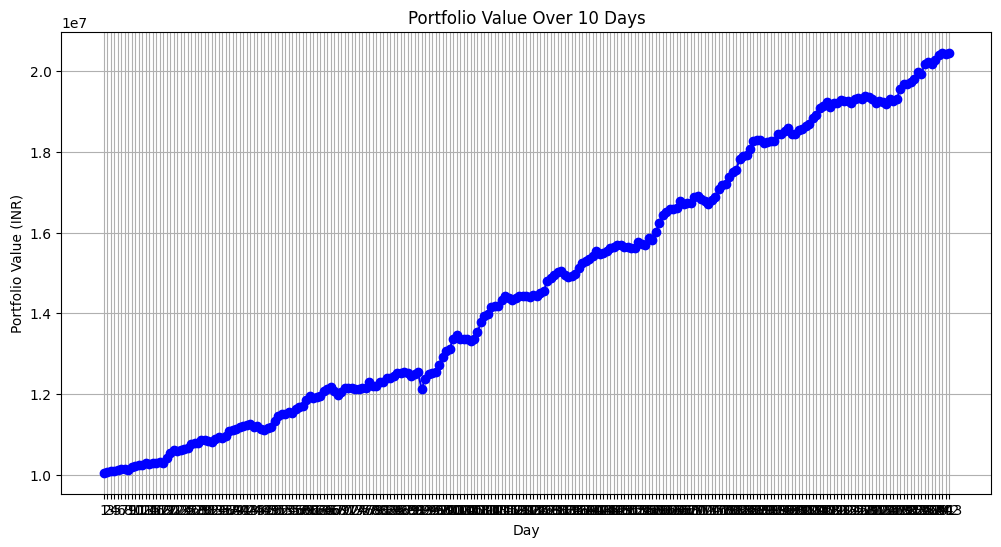

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 244), portfolio_list, marker='o', linestyle='-', color='blue')
plt.title('Portfolio Value Over 10 Days')
plt.xlabel('Day')
plt.ylabel('Portfolio Value (INR)')
plt.xticks(range(1, 244))
plt.grid()
plt.show()

In [24]:
# Convert to numpy array
portfolio_values = np.array(portfolio_list)

# 1. Daily Returns
daily_returns = np.diff(portfolio_values) / portfolio_values[:-1]

# 2. Cumulative Return (Total % return)
cumulative_return = (portfolio_values[-1] / portfolio_values[0]) - 1

# 3. Sharpe Ratio (Assuming risk-free rate = 0 and 252 trading days/year)
sharpe_ratio = np.mean(daily_returns) / np.std(daily_returns) * np.sqrt(252)

# 4. Max Drawdown
running_max = np.maximum.accumulate(portfolio_values)
drawdown = (portfolio_values - running_max) / running_max
max_drawdown = drawdown.min()  # this will be negative

# 5. Count of Profit vs Loss Days
profit_days = np.sum(daily_returns > 0)
loss_days = np.sum(daily_returns < 0)

# === Print the results ===
print(f"Total Return: {cumulative_return*100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Max Drawdown: {max_drawdown*100:.2f}%")
print(f"Profitable Days: {profit_days}, Loss Days: {loss_days}")


Total Return: 103.51%
Sharpe Ratio: 8.1293
Max Drawdown: -3.48%
Profitable Days: 173, Loss Days: 68


In [23]:
import pickle
with open("2014-15_daily_portfolio.pkl", "wb") as f:
    pickle.dump(portfolio_list, f)